In [1]:
import numpy as np
np.random.seed(888)

In [24]:
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import model_to_dot
from keras.callbacks.callbacks import EarlyStopping

## Read train, valid, test data set

In [3]:
train_data = np.load("data/train_data.npy")
train_label = np.load("data/train_label.npy")

valid_data = np.load("data/valid_data.npy")
valid_label = np.load("data/valid_label.npy")

test_data = np.load("data/test_data.npy")
test_label = np.load("data/test_label.npy")

In [25]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


## Neural Network 1

In [26]:
model_1 = Sequential()
model_1.add(Dense(4, input_shape=(2304,)))
model_1.add(Activation('softmax'))
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

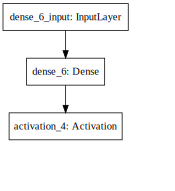

In [27]:
SVG(model_to_dot(model_1).create(prog='dot', format='svg'))

In [28]:
history_1 = model_1.fit(x = train_data, y = train_label, 
                        validation_data = (valid_data, valid_label),
                        callbacks = [monitor],
                        epochs = 50, batch_size = 1000, 
                        shuffle = True)

Train on 100641 samples, validate on 12581 samples
Epoch 1/50
100641/100641 [==============================] - 2s 22us/step - loss: 1.2773 - accuracy: 0.4078 - val_loss: 1.2124 - val_accuracy: 0.4455
Epoch 2/50
100641/100641 [==============================] - 1s 8us/step - loss: 1.1897 - accuracy: 0.4479 - val_loss: 1.1719 - val_accuracy: 0.4532
Epoch 3/50
100641/100641 [==============================] - 1s 8us/step - loss: 1.1632 - accuracy: 0.4530 - val_loss: 1.1562 - val_accuracy: 0.4568
Epoch 4/50
100641/100641 [==============================] - 1s 8us/step - loss: 1.1508 - accuracy: 0.4582 - val_loss: 1.1479 - val_accuracy: 0.4605
Epoch 5/50
100641/100641 [==============================] - 1s 8us/step - loss: 1.1433 - accuracy: 0.4606 - val_loss: 1.1438 - val_accuracy: 0.4629
Epoch 6/50
100641/100641 [==============================] - 1s 10us/step - loss: 1.1385 - accuracy: 0.4628 - val_loss: 1.1400 - val_accuracy: 0.4636
Epoch 7/50
100641/100641 [==============================] -

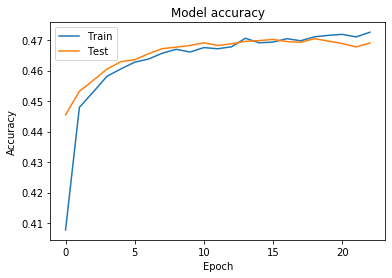

In [31]:
# Plot training & validation accuracy values
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

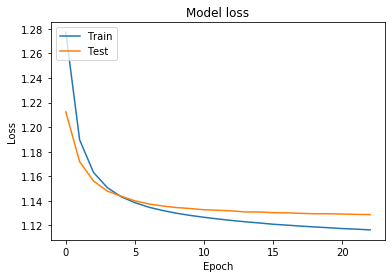

In [32]:
# Plot training & validation loss values
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Neural Network 2

In [33]:
model_2 = Sequential()
model_2.add(Dense(128, input_shape=(2304,), activation='tanh'))
model_2.add(Dense(4))
model_2.add(Activation('softmax'))
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

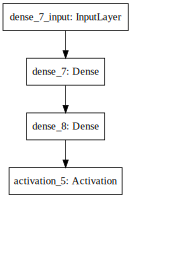

In [34]:
SVG(model_to_dot(model_2).create(prog='dot', format='svg'))

In [35]:
history_2 = model_2.fit(x = train_data, y = train_label, 
                        validation_data = (valid_data, valid_label),
                        callbacks = [monitor],
                        epochs = 50, batch_size = 1000, 
                        shuffle = True)

Train on 100641 samples, validate on 12581 samples
Epoch 1/50
100641/100641 [==============================] - 2s 23us/step - loss: 1.1716 - accuracy: 0.4451 - val_loss: 1.1401 - val_accuracy: 0.4663
Epoch 2/50
100641/100641 [==============================] - 2s 24us/step - loss: 1.1285 - accuracy: 0.4644 - val_loss: 1.1316 - val_accuracy: 0.4661
Epoch 3/50
100641/100641 [==============================] - 2s 21us/step - loss: 1.1221 - accuracy: 0.4672 - val_loss: 1.1300 - val_accuracy: 0.4657
Epoch 4/50
100641/100641 [==============================] - 3s 26us/step - loss: 1.1165 - accuracy: 0.4698 - val_loss: 1.1326 - val_accuracy: 0.4673
Epoch 5/50
100641/100641 [==============================] - 2s 22us/step - loss: 1.1145 - accuracy: 0.4701 - val_loss: 1.1317 - val_accuracy: 0.4648
Epoch 6/50
100641/100641 [==============================] - 2s 20us/step - loss: 1.1115 - accuracy: 0.4730 - val_loss: 1.1344 - val_accuracy: 0.4644
Epoch 7/50
100641/100641 [=============================

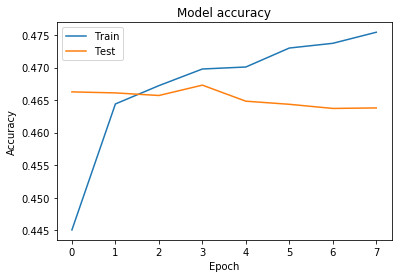

In [36]:
# Plot training & validation accuracy values
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

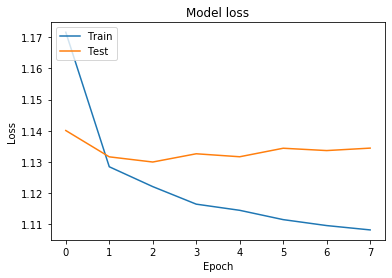

In [37]:
# Plot training & validation loss values
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Neural Network 3

In [38]:
model_3 = Sequential()
model_3.add(Dense(128, input_shape=(2304,), activation='tanh'))
model_3.add(Dropout(0.5))
model_3.add(Dense(4))
model_3.add(Activation('softmax'))
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

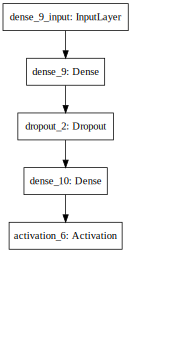

In [39]:
SVG(model_to_dot(model_3).create(prog='dot', format='svg'))

In [40]:
history_3 = model_3.fit(x = train_data, y = train_label, 
                        validation_data = (valid_data, valid_label),
                        callbacks = [monitor],
                        epochs = 50, batch_size = 1000, 
                        shuffle = True)

Train on 100641 samples, validate on 12581 samples
Epoch 1/50
100641/100641 [==============================] - 3s 26us/step - loss: 1.1793 - accuracy: 0.4413 - val_loss: 1.1366 - val_accuracy: 0.4662
Epoch 2/50
100641/100641 [==============================] - 2s 21us/step - loss: 1.1344 - accuracy: 0.4665 - val_loss: 1.1302 - val_accuracy: 0.4675
Epoch 3/50
100641/100641 [==============================] - 2s 21us/step - loss: 1.1275 - accuracy: 0.4699 - val_loss: 1.1305 - val_accuracy: 0.4667
Epoch 4/50
100641/100641 [==============================] - 2s 23us/step - loss: 1.1228 - accuracy: 0.4707 - val_loss: 1.1301 - val_accuracy: 0.4659
Epoch 5/50
100641/100641 [==============================] - 2s 21us/step - loss: 1.1202 - accuracy: 0.4732 - val_loss: 1.1308 - val_accuracy: 0.4664
Epoch 6/50
100641/100641 [==============================] - 2s 21us/step - loss: 1.1177 - accuracy: 0.4726 - val_loss: 1.1306 - val_accuracy: 0.4655
Epoch 7/50
100641/100641 [=============================

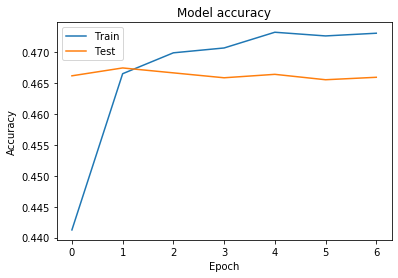

In [41]:
# Plot training & validation accuracy values
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

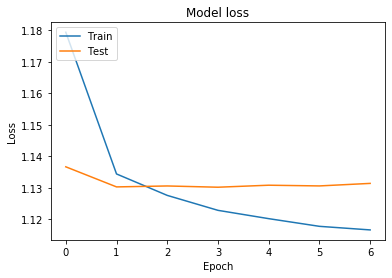

In [42]:
# Plot training & validation loss values
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model selection

Choose model 1 as the final model becasuse it has highest validation acc

## Error Analysis